[34.59820521 39.92100601 45.24380681 50.56660761]


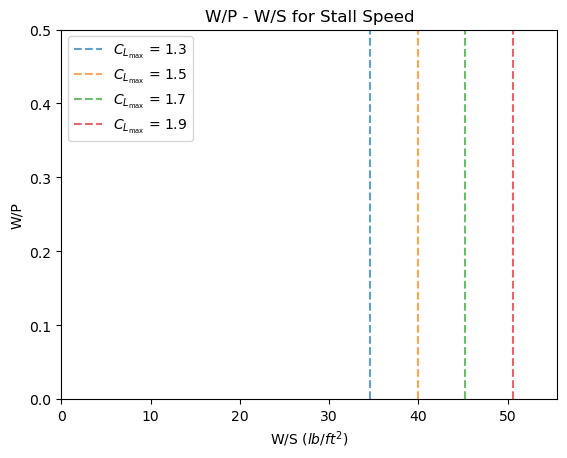

In [41]:
# Setup 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
colors = sns.color_palette() 

# CL_max is within 1.3 - 1.9

rho = 1.8685e-3 # slugs/ft^3, assuming average cruise of 8,000 ft
v_stall = 1.68781 * 100 # Convert kts to ft/s
CL_max = np.array([1.3, 1.5, 1.7, 1.9]) # Variable range of CL_max values based on Table 3.1 in Roskam

# Calculate wing loading based on stall speed
W_S = 0.5 * rho * v_stall**2 * CL_max # lb/ft^2 
print(W_S)

# Plot W/S vs W/P
plt.figure()
for i, ws in enumerate(W_S):
    plt.axvline(x=ws, color=colors[i], linestyle='--', alpha=0.7, label=f'$C_{{L_{{\\text{{max}}}}}}$ = {CL_max[i]:.1f}')
plt.title('W/P - W/S for Stall Speed')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("W/P")
plt.xlim(0, max(W_S)+5)
plt.ylim(0, 0.5)
plt.legend(loc='best')
plt.show()

149.54951952464464


(0.0, 50.0)

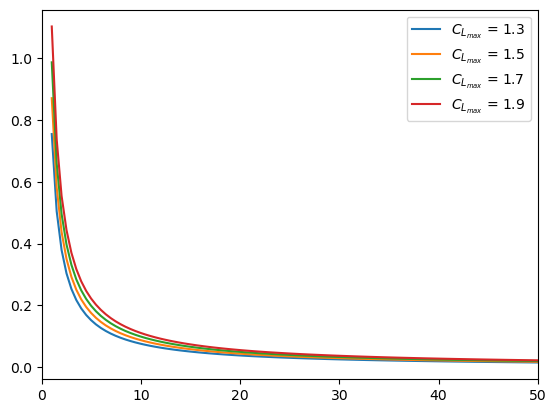

In [42]:
S_TO_G = 1000 # ft
S_TO = 1500 # ft
rho_SL = 23.77e-4 #slugs/ft3

# Relating S_TO to TOP_23
TOP_23 = (-8.134 + np.sqrt(8.314**2 - 4 * 0.0149 * -S_TO)) / (2 * 0.0149)
print(TOP_23)

W_S = np.linspace(1,50,100)
k_s = 1.2
v_TO = k_s * v_stall

plt.figure()

for CL_max in CL_max:
    P_W = (TOP_23 * (rho / rho_SL) * CL_max) / (v_TO * W_S)
    plt.plot(W_S, P_W, label=f'$C_{{L_{{max}}}}$ = {CL_max}')

plt.legend(loc='best')
plt.xlim(0,50)

Required field length: 5608.106982174174 feets
For CL_max = 1.3: Landing ground roll distance = 3090.517324585832 feet
For CL_max = 1.5: Landing ground roll distance = 2758.4483479743876 feet
For CL_max = 1.7: Landing ground roll distance = 2504.513248212695 feet
For CL_max = 1.9: Landing ground roll distance = 2304.038169453464 feet


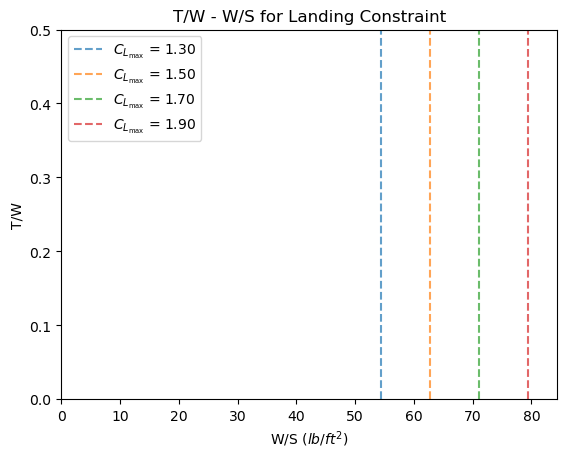

TW_landing: [54.33475744 62.6939509  71.05314435 79.4123378  54.33475744 62.6939509
 71.05314435 79.4123378  54.33475744 62.6939509  71.05314435 79.4123378
 54.33475744 62.6939509  71.05314435 79.4123378  54.33475744 62.6939509
 71.05314435 79.4123378  54.33475744 62.6939509  71.05314435 79.4123378
 54.33475744 62.6939509  71.05314435 79.4123378  54.33475744 62.6939509
 71.05314435 79.4123378  54.33475744 62.6939509  71.05314435 79.4123378
 54.33475744 62.6939509  71.05314435 79.4123378  54.33475744 62.6939509
 71.05314435 79.4123378  54.33475744 62.6939509  71.05314435 79.4123378
 54.33475744 62.6939509  71.05314435 79.4123378  54.33475744 62.6939509
 71.05314435 79.4123378  54.33475744 62.6939509  71.05314435 79.4123378
 54.33475744 62.6939509  71.05314435 79.4123378  54.33475744 62.6939509
 71.05314435 79.4123378  54.33475744 62.6939509  71.05314435 79.4123378
 54.33475744 62.6939509  71.05314435 79.4123378  54.33475744 62.6939509
 71.05314435 79.4123378  54.33475744 62.6939509  71.

In [48]:
#Balanced field length
BFL= TOP_23*37.5
print(f"Required field length: {BFL} feets")

#Calculating landing distance
CL_max_values = np.array([1.3, 1.5, 1.7, 1.9])
W_TO = 19000 #lbs
W_L = 17000 #lbs
S_ref = 534.37 #lifting area
S_a = 600 # 600 ft for general aviation
for CL_max in CL_max_values:
    S_L_G = 80 * (W_L / S_ref) / (rho/rho_SL * CL_max) + S_a
    print(f"For CL_max = {CL_max}: Landing ground roll distance = {S_L_G} feet")

#Calculate W/S
S_land = BFL *  0.6
W_S =  (rho/rho_SL * CL_max_values) / (80*0.65) * (S_land - S_a)

# Plot W/S vs W/P
plt.figure()
for i, ws in enumerate(W_S):
    plt.axvline(x=ws, color=colors[i], linestyle='--', alpha=0.7, label=f'$C_{{L_{{\\text{{max}}}}}}$ = {CL_max_values[i]:.2f}')
plt.title('T/W - W/S for Landing Constraint')
plt.xlabel("W/S $(lb/ft^2)$")
plt.ylabel("T/W")
plt.xlim(0, max(W_S)+5)
plt.ylim(0, 0.5)
plt.legend(loc='best')
plt.show()

#TW calculation
TW_landing = np.tile(W_S, 50)
print(f"TW_landing: {TW_landing}")